In [1]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from DenStream import DenStream
from math import ceil

In [2]:
np.random.seed(42)

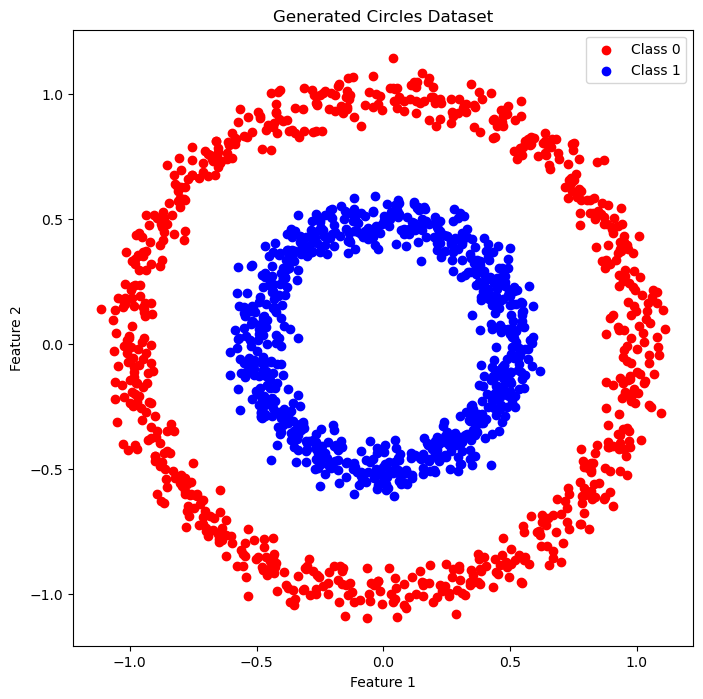

In [3]:
n_samples = 1500
X, y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title("Generated Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='best')
plt.show()

In [4]:
noisy_circles = (X,y)

In [5]:
datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2})]

In [6]:
denstream = DenStream(eps=0.3, lambd=0.1, beta=0.5, mu=11)

In [14]:
t0 = time.time()

In [15]:
y_pred = denstream.fit_predict(X)
y_pred[y_pred == -1] = 5

In [16]:
t1 = time.time()
plot_num = 1

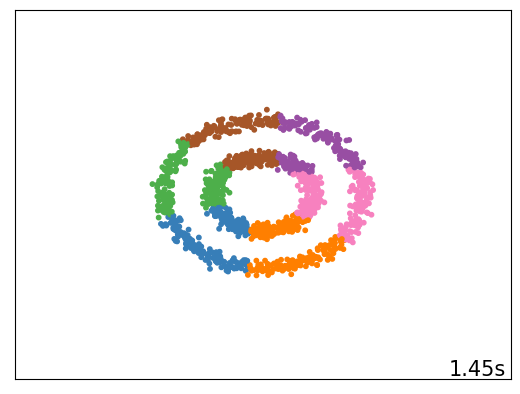

In [17]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
         transform=plt.gca().transAxes, size=15,
         horizontalalignment='right')
plot_num += 1